# Code to Apply Sequential Neural Network for House Price Prediction

In [1]:
#importing various libraries
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from kerastuner.tuners import RandomSearch
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras import optimizers
from sklearn import metrics
import numpy as np
from keras.models import Sequential
from keras.callbacks import EarlyStopping

C:\Users\hp\AppData\Local\Temp/ipykernel_38820/3656945953.py:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [4]:
#reading the dataset
df = pd.read_excel(r'C:/Users/hp/dissertation/Datasets/final_data.xlsx')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPD Category Type,current_energy_rating,construction_age_band,total_floor_area,energy_tariff,areacode,day,month,year,county_rank
0,90000,2022-02-22,T,0,0,NOTTINGHAM,CITY OF NOTTINGHAM,CITY OF NOTTINGHAM,0,E,1900-1929,79.0,dual,NG6,22,2,2022,67
1,250000,2022-02-04,T,0,0,NEWARK,NEWARK AND SHERWOOD,NOTTINGHAMSHIRE,0,0,unknown,0.0,unknown,NG24,4,2,2022,97
2,160000,2022-04-25,S,0,0,SUTTON-IN-ASHFIELD,ASHFIELD,NOTTINGHAMSHIRE,0,0,unknown,0.0,unknown,NG17,25,4,2022,97
3,315000,2022-02-28,S,0,0,NOTTINGHAM,BROXTOWE,NOTTINGHAMSHIRE,0,D,1950-1966,75.0,Single,NG9,28,2,2022,97
4,115000,2022-04-29,T,0,0,RETFORD,BASSETLAW,NOTTINGHAMSHIRE,0,G,1900-1929,80.0,Single,DN22,29,4,2022,97


In [5]:
#one hot encoding
dummy_df = pd.get_dummies(df, prefix={'Property Type':'Property_Type',
                                      'District':'District',
                                            'Town/City':'Town/City',
                                      'County':'County',
                                      'current_energy_rating':'current_energy_rating',
                                      'construction_age_band':'construction_age_band',
                                      'construction_age_band':'construction_age_band',
                                     'energy_tariff':'energy_tariff',
                                     'areacode':'areacode'})

In [6]:
#viewing top 5 rows 
dummy_df.head()

,Price,Date of Transfer,Old/New,Duration,PPD Category Type,total_floor_area,day,month,year,county_rank,...,areacode_YO32,areacode_YO41,areacode_YO42,areacode_YO43,areacode_YO51,areacode_YO60,areacode_YO61,areacode_YO62,areacode_YO7,areacode_YO8
0,90000,2022-02-22,0,0,0,79.0,22,2,2022,67,...,0,0,0,0,0,0,0,0,0,0
1,250000,2022-02-04,0,0,0,0.0,4,2,2022,97,...,0,0,0,0,0,0,0,0,0,0
2,160000,2022-04-25,0,0,0,0.0,25,4,2022,97,...,0,0,0,0,0,0,0,0,0,0
3,315000,2022-02-28,0,0,0,75.0,28,2,2022,97,...,0,0,0,0,0,0,0,0,0,0
4,115000,2022-04-29,0,0,0,80.0,29,4,2022,97,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#splitting the dataset into dependent and independent variables
X = dummy_df.drop(['Price','Date of Transfer','day','month','year'],axis=1)
y =dummy_df['Price']

In [8]:
#printing the shapes
print("Shape of X :",X.shape)
print("Shape of y :",y.shape)

Shape of X : (213440, 3886)
Shape of y : (213440,)


In [9]:
#scaling the dataset
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(df[['Price']])

In [10]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)

In [11]:
#function to return the layers of model
def seq_model(parameters):
    model = keras.Sequential()
    for i in range(parameters.Int('num_layers', 2, 6)):
        model.add(layers.Dense(units=parameters.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            parameters.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [12]:
#using random search to find optimized number of layers of neural network
keras_tuner = RandomSearch(seq_model,objective='val_mean_absolute_error',max_trials=5,executions_per_trial=3,
                           directory='network',project_name='House price prediction')

INFO:tensorflow:Reloading Oracle from existing project network\House price prediction\oracle.json
INFO:tensorflow:Reloading Tuner from network\House price prediction\tuner0.json


In [13]:
#printing the summary of randomsearch
keras_tuner.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [14]:
#training the data to find optimum parameters
keras_tuner.search(X_train, y_train,epochs=30,validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [15]:
#printing the summary of results
keras_tuner.results_summary()

Results summary
Results in network\House price prediction
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 160
learning_rate: 0.01
units_2: 64
units_3: 64
units_4: 96
units_5: 128
units_6: 128
units_7: 192
units_8: 32
Score: 57607.6328125
Trial summary
Hyperparameters:
num_layers: 8
units_0: 32
units_1: 32
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
Score: 57986.604166666664
Trial summary
Hyperparameters:
num_layers: 3
units_0: 128
units_1: 32
learning_rate: 0.001
units_2: 192
units_3: 224
units_4: 128
units_5: 224
units_6: 224
units_7: 64
units_8: 96
Score: 58123.764322916664
Trial summary
Hyperparameters:
num_layers: 6
units_0: 64
units_1: 32
learning_rate: 0.0001
units_2: 192
units_3: 256
units_4: 192
units_5: 64
units_6: 256
units_7: 64
Score: 58733.580729166664
Trial summary
Hyperparameters:
num_layers: 3
units_0: 64
units_1: 96
learning_rate: 0.0001
units_2: 64
units_3: 192
units_4: 160
units

In [16]:
#saving the optimum parameters into variable
best_params = keras_tuner.get_best_hyperparameters(num_trials=1)[0]

In [17]:
#building model with optimal parameters returned by random seaRch
model = keras_tuner.hypermodel.build(best_params)
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test),validation_split=0.2)

Epoch 1/100
4269/4269 [==============================] - 30s 7ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - val_loss: 0.0714 - val_mean_absolute_error: 0.0714
Epoch 2/100
4269/4269 [==============================] - 25s 6ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - val_loss: 0.0682 - val_mean_absolute_error: 0.0682
Epoch 3/100
4269/4269 [==============================] - 27s 6ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - val_loss: 0.0704 - val_mean_absolute_error: 0.0704
Epoch 4/100
4269/4269 [==============================] - 26s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - val_loss: 0.0659 - val_mean_absolute_error: 0.0659
Epoch 5/100
4269/4269 [==============================] - 26s 6ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - val_loss: 0.0700 - val_mean_absolute_error: 0.0700
Epoch 6/100
4269/4269 [==============================] - 24s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - val_loss: 0.0643 - val_mean_absolute_error:

4269/4269 [==============================] - 24s 6ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - val_loss: 0.0686 - val_mean_absolute_error: 0.0686
Epoch 98/100
4269/4269 [==============================] - 23s 5ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - val_loss: 0.0683 - val_mean_absolute_error: 0.0683
Epoch 99/100
4269/4269 [==============================] - 24s 6ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - val_loss: 0.0679 - val_mean_absolute_error: 0.0679
Epoch 100/100
4269/4269 [==============================] - 23s 5ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - val_loss: 0.0674 - val_mean_absolute_error: 0.0674


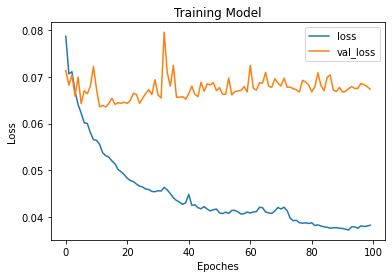

In [18]:
#plotting the loss of the model
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.title('Training Model')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.show()

In [19]:
#predicting the test data
y_pred = model.predict(X_test)

In [21]:
#checking the accuracy
MAE_SNN =metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', MAE_SNN)
MSE_SNN =metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', MSE_SNN)
RMSE_SNN=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', RMSE_SNN)
ACC_SNN =metrics.r2_score(y_test,y_pred)
print('Accuracy Score :',ACC_SNN)

Mean Absolute Error: 0.0670499007014355
Mean Squared Error: 0.010840937952645274
Root Mean Squared Error: 0.10411982497413869
Accuracy Score : 0.6873221273228846
